Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Customers Head:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -----------

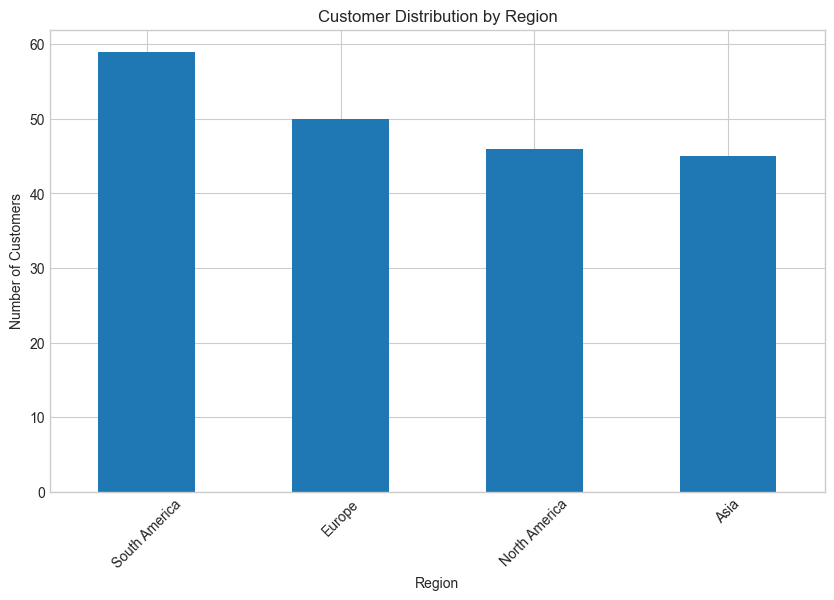

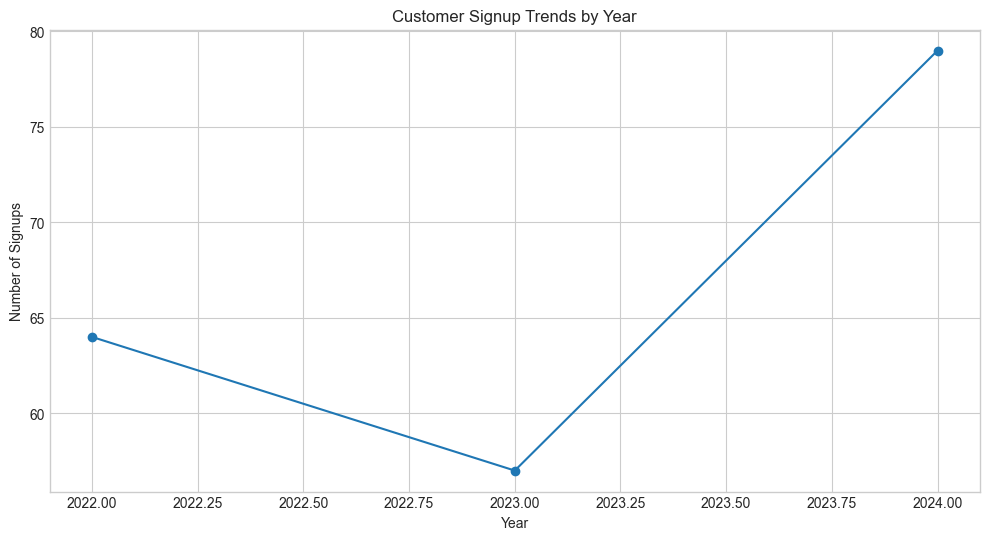

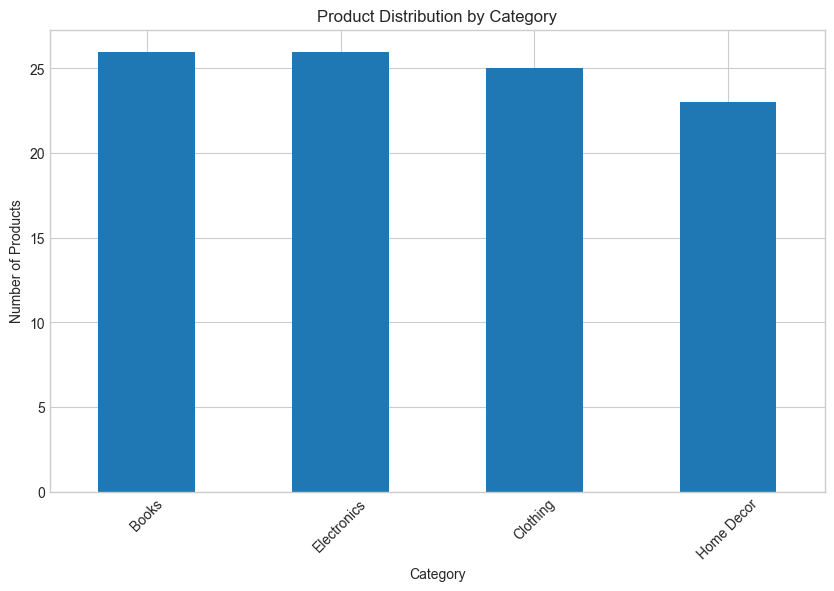

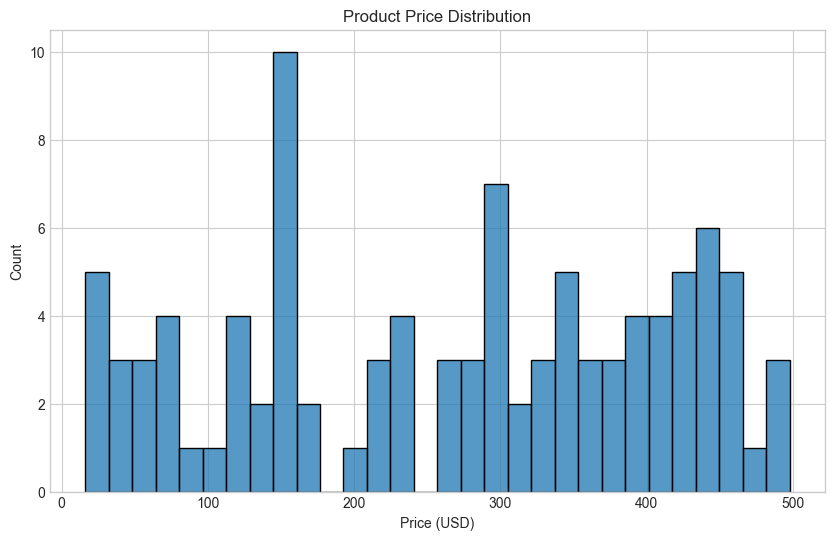

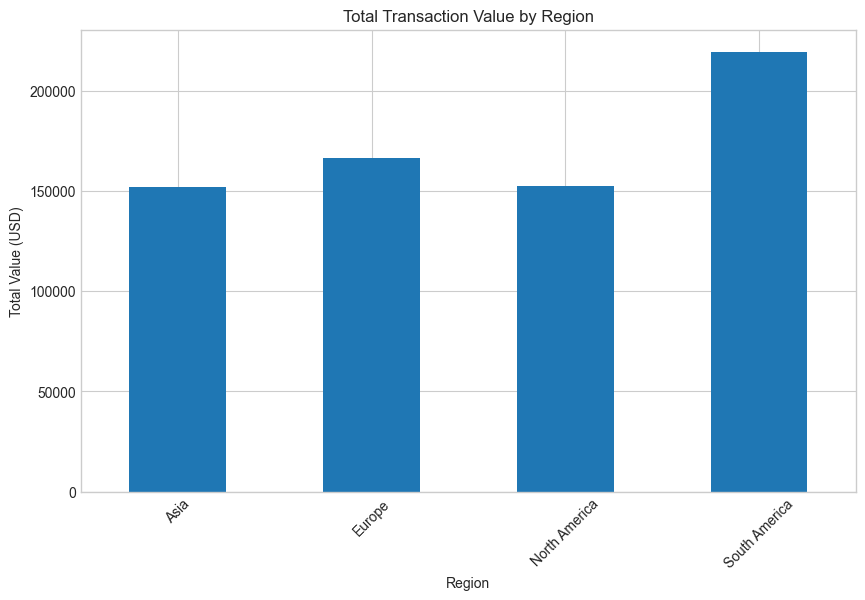

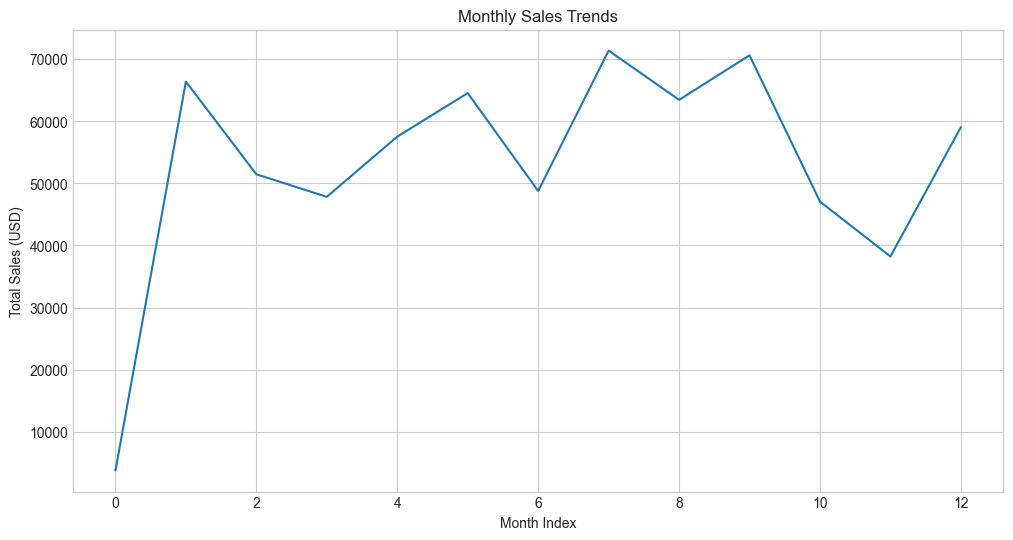


Key Business Insights:
1. Customer Base: Total of 200 customers across different regions
2. Revenue Performance: Total revenue of $689,995.56
3. Average Transaction: $690.00 per transaction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Instead of using 'seaborn' directly, use 'seaborn-v0_8-whitegrid'
# or another style from the 'seaborn-v0_8' family:
plt.style.use('seaborn-v0_8-whitegrid')
# Alternatively, use Seaborn's set_style() function:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')
def explore_basic_info():
    print("Customers Dataset Info:")
    print(customers_df.info())
    print("\nCustomers Head:")
    print(customers_df.head())

    print("\nProducts Dataset Info:")
    print(products_df.info())
    print("\nProducts Head:")
    print(products_df.head())

    print("\nTransactions Dataset Info:")
    print(transactions_df.info())
    print("\nTransactions Head:")
    print(transactions_df.head())
def check_data_quality():
    # Check for missing values
    print("Missing Values Summary:")
    print(customers_df.isnull().sum())
    print(products_df.isnull().sum())
    print(transactions_df.isnull().sum())

    # Check for duplicates
    print("\nDuplicate Records:")
    print(f"Customers duplicates: {customers_df.duplicated().sum()}")
    print(f"Products duplicates: {products_df.duplicated().sum()}")
    print(f"Transactions duplicates: {transactions_df.duplicated().sum()}")
def analyze_customers():
    # Customer distribution by region
    plt.figure(figsize=(10, 6))
    customers_df['Region'].value_counts().plot(kind='bar')
    plt.title('Customer Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.show()

    # Customer signup trends
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
    customers_df['SignupMonth'] = customers_df['SignupDate'].dt.month

    plt.figure(figsize=(12, 6))
    customers_df.groupby('SignupYear')['CustomerID'].count().plot(kind='line', marker='o')
    plt.title('Customer Signup Trends by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Signups')
    plt.show()
def analyze_products():
    # Product distribution by category
    plt.figure(figsize=(10, 6))
    products_df['Category'].value_counts().plot(kind='bar')
    plt.title('Product Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Products')
    plt.xticks(rotation=45)
    plt.show()

    # Price distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=products_df, x='Price', bins=30)
    plt.title('Product Price Distribution')
    plt.xlabel('Price (USD)')
    plt.show()
def analyze_transactions():
    # Merge transactions with customer and product info
    merged_df = transactions_df.merge(customers_df, on='CustomerID')\
                             .merge(products_df, on='ProductID')

    # Transaction value by region
    plt.figure(figsize=(10, 6))
    region_sales = merged_df.groupby('Region')['TotalValue'].sum()
    region_sales.plot(kind='bar')
    plt.title('Total Transaction Value by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Value (USD)')
    plt.xticks(rotation=45)
    plt.show()

    # Transaction trends over time
    merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
    merged_df['TransactionYear'] = merged_df['TransactionDate'].dt.year
    merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.month

    monthly_sales = merged_df.groupby(['TransactionYear', 'TransactionMonth'])['TotalValue'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(monthly_sales)), monthly_sales['TotalValue'])
    plt.title('Monthly Sales Trends')
    plt.xlabel('Month Index')
    plt.ylabel('Total Sales (USD)')
    plt.show()
def generate_insights():
    """
    Generate key business insights based on the analysis
    """
    insights = []

    # Calculate metrics for insights
    total_customers = len(customers_df)
    total_revenue = transactions_df['TotalValue'].sum()
    avg_transaction_value = transactions_df['TotalValue'].mean()

    # Add insights to the list
    insights.append(f"1. Customer Base: Total of {total_customers} customers across different regions")
    insights.append(f"2. Revenue Performance: Total revenue of ${total_revenue:,.2f}")
    insights.append(f"3. Average Transaction: ${avg_transaction_value:,.2f} per transaction")

    return insights

# Main execution
if __name__ == "__main__":
    # Run all analyses
    explore_basic_info()
    check_data_quality()
    analyze_customers()
    analyze_products()
    analyze_transactions()

    # Generate and print insights
    insights = generate_insights()
    print("\nKey Business Insights:")
    for insight in insights:
        print(insight)
